In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

In [3]:
import seaborn as sns 
sns.set() 
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv("data/Countries.csv") 
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [5]:
data['Longitude'].describe() 

count    241.000000
mean      14.215380
std       72.013654
min     -177.348348
25%      -36.433184
50%       18.644925
75%       47.587005
max      171.484924
Name: Longitude, dtype: float64

In [6]:
data['Latitude'].describe() 

count    241.000000
mean      17.169377
std       26.554014
min      -80.508579
25%        1.358761
50%       17.277500
75%       39.115541
max       74.710513
Name: Latitude, dtype: float64

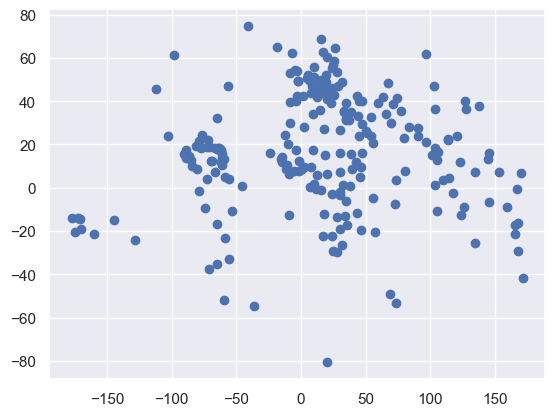

In [7]:
plt.scatter(data['Longitude'],data['Latitude']) 

In [8]:
cdata=data.iloc[:,1:3] 

In [9]:
cdata

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [10]:
kmeans = KMeans(2)  

In [11]:
kmeans.fit(cdata) 

KMeans(n_clusters=2)

In [12]:
identified_clusters = kmeans.fit_predict(cdata)

In [13]:
identified_clusters 

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int32)

In [14]:
len(identified_clusters) 

241

In [15]:
country_cluster=data.copy() 

In [16]:
country_cluster['ClusterNo']=identified_clusters

In [17]:
country_cluster 

,name,Longitude,Latitude,ClusterNo
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


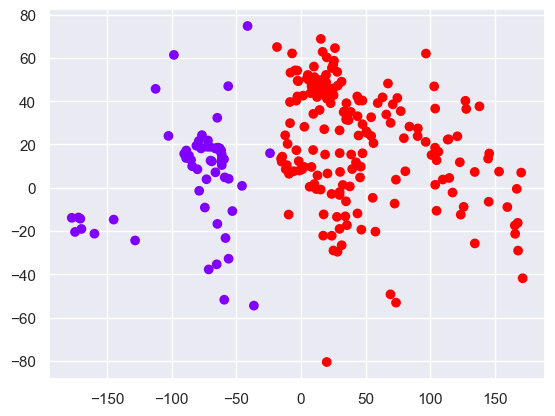

In [18]:
plt.scatter(country_cluster['Longitude'],country_cluster['Latitude'],c=country_cluster['ClusterNo'],cmap='rainbow')

In [19]:
wcss=[] 
for i in range(1,11): 
    kmeans = KMeans(i) 
    kmeans.fit(cdata) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter) 

In [20]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325255.15398078033,
 256734.58387798426,
 249363.38344216446,
 154308.09867578576,
 127716.94111629606,
 122865.74956964434,
 98436.68236560919,
 76852.32067373404]

Text(0, 0.5, 'Within-cluster Sum of Squares')

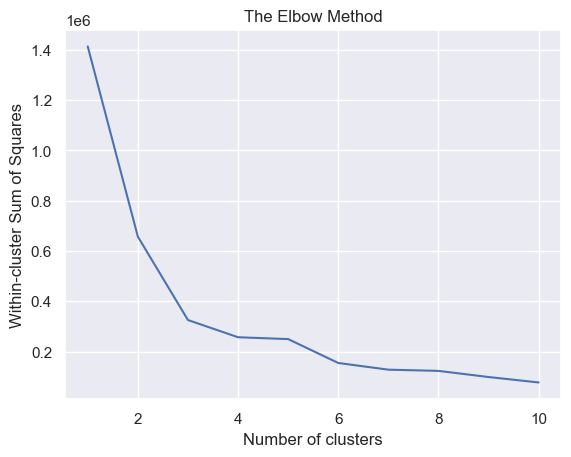

In [21]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares') 